# Integração Python + Excel

### 2 formas:

1. Pandas
    - Mais usada no geral
    - Trata o Excel como uma base de dados  --> não se preocupa com as fórmulas e gráficos
   
    - Faz o que quiser com o arquivo
    - Pode desfazer a estrutura original do arquivo, caso queira editar
    
2. Openpyxl
    - Trata o Excel como uma planilha mesmo que pode ter várias coisas
    - Edita "como se fosse um VBA"
    - Menos eficiente
    - Mantém mais a estrutura original do arquivo, mas cuidado porque não necessariamente tudo, então tem que testar

### Desafio

- Temos uma planilha de produtos e serviços. Com o aumento de imposto sobre os serviços, temos que atualizar o preço dos produtos impactados pela mudança.

Novo Multiplicador Imposto: 1.5

In [11]:
# pandas
import pandas as pd

tabela = pd.read_excel('Produtos.xlsx')
display(tabela)


,Produtos,Preço Base Original,Tipo,Multiplicador Imposto,Preço Base Reais
0,Tablet,999.99,Produto,1.1,1099.989
1,Pós Graduação,4500.00,Serviço,1.3,5850.000
2,Celular,899.99,Produto,1.1,989.989
3,Passagem Aérea,799.00,Serviço,1.3,1038.700
4,Computador,3000.00,Produto,1.1,3300.000
5,SPA,480.48,Serviço,1.3,624.624
6,Corte Cabelo,50.00,Serviço,1.3,65.000


In [26]:
# atualizando a cotação e as colunas seguintes
#no Pandas temos que atualizar o multiplicador e atualizar o preço com imposto, pois o pandas não ler formulas

tabela.loc[tabela['Tipo'] == 'Serviço','Multiplicador Imposto'] = 1.5
tabela

,Produtos,Preço Base Original,Tipo,Multiplicador Imposto,Preço Base Reais
0,Tablet,999.99,Produto,1.1,1099.989
1,Pós Graduação,4500.00,Serviço,1.5,6750.000
2,Celular,899.99,Produto,1.1,989.989
3,Passagem Aérea,799.00,Serviço,1.5,1198.500
4,Computador,3000.00,Produto,1.1,3300.000
5,SPA,480.48,Serviço,1.5,720.720
6,Corte Cabelo,50.00,Serviço,1.5,75.000


In [28]:

tabela.loc[tabela['Tipo'] == 'Serviço','Preço Base Reais'] = tabela['Multiplicador Imposto']*tabela['Preço Base Original']

# ou!

tabela['Preço Base Reais'] = tabela['Multiplicador Imposto'] * tabela['Preço Base Original']
tabela

tabela.to_excel("Produtos_Pandas.xlsx")  # --> Caso queira salvar o Novo arquivo



	Produtos	Preço Base Original	Tipo	Multiplicador Imposto	Preço Base Reais
0	Tablet	999,99	Produto	1,1	1099,989
1	Pós Graduação	4500	Serviço	1,5	6750
2	Celular	899,99	Produto	1,1	989,989
3	Passagem Aérea	799	Serviço	1,5	1198,5
4	Computador	3000	Produto	1,1	3300
5	SPA	480,48	Serviço	1,5	720,72
6	Corte Cabelo	50	Serviço	1,5	75
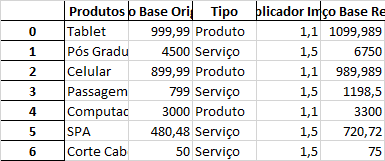

In [29]:
#é importante notar que os dados salvos no arquivo não apresentam fórmulas e vão com a COLUNA DE ÍNDICE.
# para retirar o index, basta passar o parâmetro index = False
tabela.to_excel("Produtos_Pandas.xlsx" , index=False )

In [54]:
# openpyxl
from openpyxl import Workbook, load_workbook
# só precisaremos do módulod e workbook do openpyxl

planilha = load_workbook("Produtos.xlsx")

aba_ativa = planilha.active
# no openpyxl precisamos selecionar a ABA qe estamos trabalhando.

for celula in aba_ativa["C"]:
    if celula.value == 'Serviço':
        linha = celula.row
        aba_ativa[f'D{linha}'] = 1.5

planilha.save("Produtos_openpyxl.xlsx")

Nota-se que no openPyxl não tivemos uma visualização prévia no notebook, e que as alterações se deram dentro do próprio arquivo do excel.

Mantendo as fórmulas, assim como o gráfico que lá havia, portanto nao precisando modificar o valor do preço base reais, pois a fórmula fez isso automaticamente, assim como o gráfico mudou baseado nos próprios dados.
